In [34]:
import scipy.io as spio
import matplotlib.pyplot as plt
import main
import os
import numpy as np
import scipy.signal as signal
import scipy.interpolate as interpolate
import scipy as sp


In [2]:
matfile = "C:\\Users\\sgpq58\\Research_Share\\Post Doctoral Research\\scarp_work\\wassuk_range\\nevada_profiles.mat"
matdata = spio.loadmat(matfile)

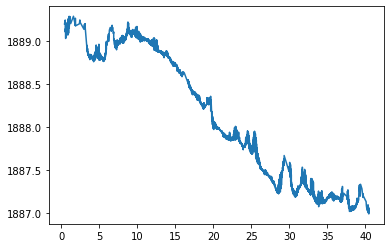

In [3]:
jimprof2 = matdata['jimprof2']
x = jimprof2[:,0]
z = jimprof2[:,1]
I = np.argsort(x)
x = x[I]
z = z[I]
plt.plot(x, z)

In [4]:
opt_midx, opt_midz, b1_out, b2_out, opt_h = main.dsp_scarp_identify(jimprof2[:, 0], jimprof2[:, 1])

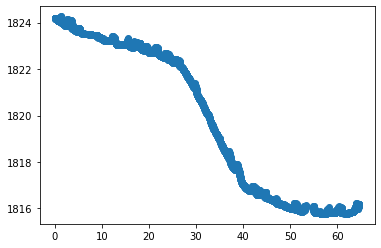

In [7]:
johnstonprof1 = matdata['johnstonprof1']
x = johnstonprof1[:, 0]
z = johnstonprof1[:, 1]
plt.scatter(x,z)

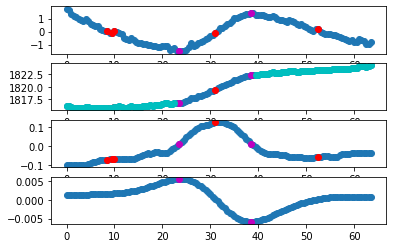

In [59]:
sample_dist = 1
I = np.argsort(x)
x = x[I]
z = z[I]
if z[0] > z[-1]:
    z = np.flip(z)
    x = x[-1] - np.flip(x)
x_max = np.floor(x.max())
if x_max < 100:
    sample_dist = 0.5
x_new = np.arange(0, x_max, sample_dist)
gfg = interpolate.interp1d(x, z, fill_value='extrapolate')
z_new = gfg(x_new)
det_z = signal.detrend(z_new)
det_filt = sp.ndimage.gaussian_filter(det_z, 10)
slope_filt = signal.savgol_filter(det_z, 17, 1, deriv=1)
# slope_filt = np.gradient(det_filt)
filt_2_der = np.gradient(slope_filt)
filt_2_der_smooth = sp.ndimage.gaussian_filter1d(filt_2_der, 10)
det_z_crossings = np.where(np.diff(np.sign(det_z)))[0]
der_max = np.argmax(filt_2_der_smooth)
der_min = np.argmin(filt_2_der_smooth)
der_2_peaks = np.array([der_max, der_min])

peaks, _ = signal.find_peaks(slope_filt)
peak_width_res = signal.peak_widths(slope_filt, peaks, rel_height=1)
max_peak = peaks[np.argmax(peak_width_res[0])]
max_peak_width = np.max(peak_width_res[0])
opt_midx = x_new[max_peak]
opt_midz = z_new[max_peak]

x_upper = x_new[(slope_filt < 0) & (z_new > opt_midz)]
x_lower = x_new[(slope_filt < 0) & (z_new < opt_midz)]
z_upper = z_new[(slope_filt < 0) & (z_new > opt_midz)]
z_lower = z_new[(slope_filt < 0) & (z_new < opt_midz)]



plt.subplot(4, 1, 1)
plt.scatter(x_new, det_z)
plt.scatter(x_new[det_z_crossings], det_z[det_z_crossings], c='r')
plt.scatter(x_new[der_2_peaks], det_z[der_2_peaks], c='m')
plt.subplot(4, 1, 2)
plt.scatter(x_new, z_new)
plt.scatter(x_new[det_z_crossings], z_new[det_z_crossings], c='r')
plt.scatter(x_new[der_2_peaks], z_new[der_2_peaks], c='m')
plt.scatter(x_lower, z_lower, c='c')
plt.scatter(x_upper, z_upper, c='c')
plt.subplot(4, 1, 3)
plt.scatter(x_new,slope_filt)
plt.scatter(x_new[det_z_crossings], slope_filt[det_z_crossings], c='r')
plt.scatter(x_new[der_2_peaks], slope_filt[der_2_peaks], c='m')
plt.subplot(4, 1, 4)
plt.scatter(x_new,filt_2_der_smooth)
plt.scatter(x_new[der_2_peaks], filt_2_der_smooth[der_2_peaks], c='m')

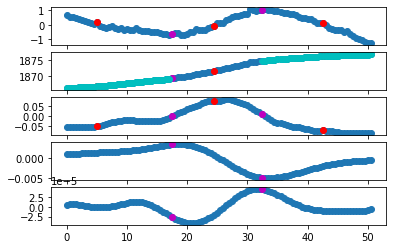

In [72]:
prof_data = matdata['day7prof1']
x = prof_data[:, 0]
z = prof_data[:, 1]
sample_dist = 1
I = np.argsort(x)
x = x[I]
z = z[I]
if z[0] > z[-1]:
    z = np.flip(z)
    x = x[-1] - np.flip(x)
x_max = np.floor(x.max())
if x_max < 100:
    sample_dist = 0.5
x_new = np.arange(0, x_max, sample_dist)
gfg = interpolate.interp1d(x, z, fill_value='extrapolate')
z_new = gfg(x_new)
det_z = signal.detrend(z_new)
det_filt = sp.ndimage.gaussian_filter(det_z, 10)
slope_filt = signal.savgol_filter(det_z, 17, 1, deriv=1)
# slope_filt = np.gradient(det_filt)
filt_2_der = np.gradient(slope_filt)
filt_2_der_smooth = sp.ndimage.gaussian_filter1d(filt_2_der, 10)
det_z_crossings = np.where(np.diff(np.sign(det_z)))[0]
slope_z_crossings = np.where(np.diff(np.sign(slope_filt)))[0]
der_max = np.argmax(filt_2_der_smooth)
der_min = np.argmin(filt_2_der_smooth)
der_2_peaks = np.array([der_max, der_min])
filt_4_der_smooth = np.gradient(np.gradient(filt_2_der_smooth))
der_4_max = np.argmax(filt_4_der_smooth)
der_4_min = np.argmin(filt_4_der_smooth)
der_4_peaks = np.array([der_4_min, der_4_max])

peaks, _ = signal.find_peaks(slope_filt)
peak_width_res = signal.peak_widths(slope_filt, peaks, rel_height=1)
max_peak = peaks[np.argmax(peak_width_res[0])]
max_peak_width = np.max(peak_width_res[0])
opt_midx = x_new[max_peak]
opt_midz = z_new[max_peak]

lower = range(0, slope_z_crossings[0])
upper = range(slope_z_crossings[1], len(z_new))

x_lower = x_new[lower]
x_upper = x_new[upper]
z_lower = z_new[lower]
z_upper = z_new[upper]



plt.subplot(5, 1, 1)
plt.scatter(x_new, det_z)
plt.scatter(x_new[det_z_crossings], det_z[det_z_crossings], c='r')
plt.scatter(x_new[slope_z_crossings], det_z[slope_z_crossings], c='m')
plt.subplot(5, 1, 2)
plt.scatter(x_new, z_new)
plt.scatter(x_new[det_z_crossings], z_new[det_z_crossings], c='r')
plt.scatter(x_new[slope_z_crossings], z_new[slope_z_crossings], c='m')
plt.scatter(x_lower, z_lower, c='c')
plt.scatter(x_upper, z_upper, c='c')
plt.subplot(5, 1, 3)
plt.scatter(x_new,slope_filt)
plt.scatter(x_new[det_z_crossings], slope_filt[det_z_crossings], c='r')
plt.scatter(x_new[slope_z_crossings], slope_filt[slope_z_crossings], c='m')
plt.subplot(5, 1, 4)
plt.scatter(x_new,filt_2_der_smooth)
plt.scatter(x_new[slope_z_crossings], filt_2_der_smooth[slope_z_crossings], c='m')
plt.subplot(5, 1, 5)
plt.scatter(x_new, np.gradient(np.gradient(filt_2_der_smooth)))
plt.scatter(x_new[slope_z_crossings], filt_4_der_smooth[slope_z_crossings], c='m')